# Data Frame Creation and visualization 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url)

df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','flower_type']
df['flower_type'] = df['flower_type'].astype('category')
df.flower_type = df.flower_type.cat.rename_categories([0,1,2])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [5]:
df['flower_type'].describe()

count     149
unique      3
top         2
freq       50
Name: flower_type, dtype: int64

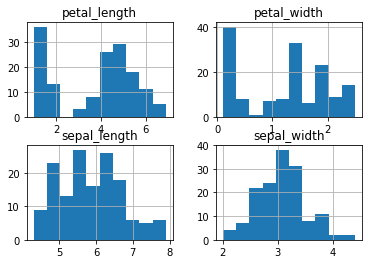

In [6]:
df.hist()
plt.show()

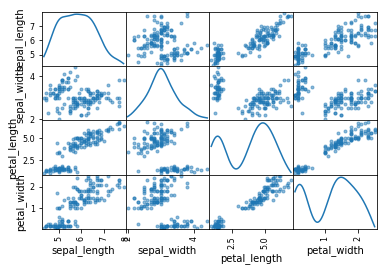

In [11]:
pd.scatter_matrix(df, diagonal='kde')
plt.show()

‘bar’ or ‘barh’ for bar plots
‘hist’ for histogram
‘box’ for boxplot
‘kde’ or ‘density’ for density plots
‘area’ for area plots
‘scatter’ for scatter plots
‘hexbin’ for hexagonal bin plots
‘pie’ for pie plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-kde



More general:
http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


# More Operations on the Data Frame

In [25]:
df = df.sort_values(by='sepal_width')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
59,5.0,2.0,3.5,1.0,1
61,6.0,2.2,4.0,1.0,1
118,6.0,2.2,5.0,1.5,2
67,6.2,2.2,4.5,1.5,1
92,5.0,2.3,3.3,1.0,1


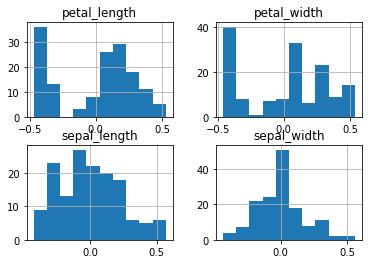

In [9]:
# Normalizing your data set
df=df.ix[:,0:4].apply( lambda f: ( f - f.mean() )/( f.max() - f.min() ) )
df.hist()
plt.show()

In [26]:
# Get a random sample from the data set
df=df.sample(frac=1.0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
113,5.8,2.8,5.1,2.4,2
36,4.9,3.1,1.5,0.1,0
62,6.1,2.9,4.7,1.4,1
98,5.7,2.8,4.1,1.3,1
15,5.4,3.9,1.3,0.4,0


In [27]:
# Split the data set into test and train set
train=df.sample(frac=0.8,random_state=123)
test=df.drop(train.index)

# Read/Write

In [28]:
df.to_csv('iris_normalized.csv')
new_df = pd.read_csv('iris_normalized.csv')
new_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,113,5.8,2.8,5.1,2.4,2
1,36,4.9,3.1,1.5,0.1,0
2,62,6.1,2.9,4.7,1.4,1
3,98,5.7,2.8,4.1,1.3,1
4,15,5.4,3.9,1.3,0.4,0


# Deal with missing data 

In [15]:
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, np.nan, 5],
                    [np.nan, 3, np.nan, 4]],
                    columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [16]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [17]:
 df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df

,born,name,toy
0,NaT,Alfred,NaN
1,1940-04-25,Batman,Batmobile
2,NaT,Catwoman,Bullwhip


In computer programming, a sentinel value (also referred to as a flag value, trip value, rogue value, signal value, or dummy data) is a special value in the context of an algorithm which uses its presence as a condition of termination, typically in a loop or recursive algorithm.

floating-point NaN

In [18]:
df.dropna()

,born,name,toy
1,1940-04-25,Batman,Batmobile


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

# Features extraction

# Text Features

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

sample = ['sample of evil', 'evil queen', 'horizon problem']
vec = CountVectorizer()
X = vec.fit_transform(sample)
# print(X.toarray())
feature_extraction = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

   evil  horizon  of  problem  queen  sample
0     1        0   1        0      0       1
1     1        0   0        0      1       0
2     0        1   0        1      0       0


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
feature_extraction = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

       evil   horizon        of   problem     queen    sample
0  0.473630  0.000000  0.622766  0.000000  0.000000  0.622766
1  0.605349  0.000000  0.000000  0.000000  0.795961  0.000000
2  0.000000  0.707107  0.000000  0.707107  0.000000  0.000000


# Derived Features

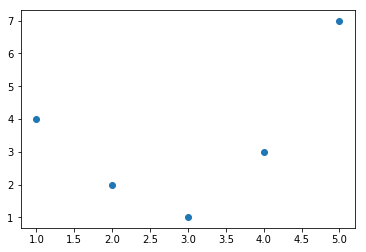

In [10]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)
plt.show()

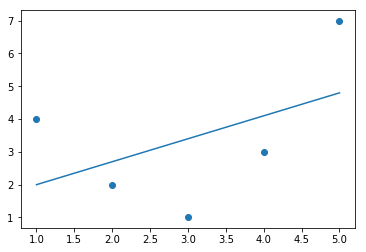

In [77]:
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.show()

X
 [[1]
 [2]
 [3]
 [4]
 [5]]

X2
 [[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


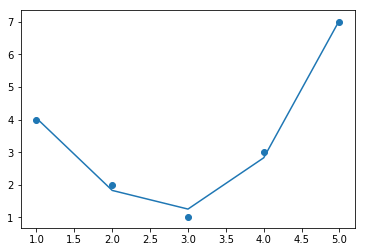

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
print("X\n", X)
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
# https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print("\nX2\n", X2)


model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.show()


#     degree : integer
#     The degree of the polynomial features

#     include_bias : boolean
#     If True (default), then include a bias column,
#     the feature in which all polynomial powers are zero
#     (i.e. a column of ones - acts as an intercept term in a linear model).


#     rows = np.array([0, 3], dtype=np.intp)
#     columns = np.array([0, 2], dtype=np.intp)
#     rows[:, np.newaxis]
#     array([[0],
#        [3]])

#     # intp	Integer used for indexing (same as C ssize_t; normally either int32 or int64



# Scipy

• A collection of mathematical algorithms

• Gives Python similar capabilities as Matlab

• Many submodules are used for different domains

• We will see examples from linalg and optimize submodules

• For details: http://docs.scipy.org/doc/scipy/reference/tutorial/index.html

linalg: Linear Algebra submodule

Linear algebra submodule provides several routines for matrix computations.
For example to find the inverse of matrix A

In [5]:
from scipy import linalg as la
import numpy as np
A = np.array([[5,3,5],[2,2,0], [1,3,1]])
iA = la.inv(A)
print(iA)

[[  8.33333333e-02   5.00000000e-01  -4.16666667e-01]
 [ -8.33333333e-02  -1.15648232e-17   4.16666667e-01]
 [  1.66666667e-01  -5.00000000e-01   1.66666667e-01]]


# Solving linear systems of equations

$Ax=b
\\
\begin{bmatrix}5 & 3 & 5 \\ 2 & 2 & 0 \\ 1 & 3& 1\end{bmatrix}
\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}=
\begin{bmatrix}2 \\ 5 \\ 1\end{bmatrix}$

In [6]:
import numpy as np
A = np.array([[5,3,5], [2,2,0], [1,3,1]])
b = np.array([ 2, 5, 1])
x = la.solve(A,b)
print('Solution:', x)
# x = la.inv(A).dot(b) # same result

Solution: [ 2.25  0.25 -2.  ]


Matrix Decomposition

$
\begin{bmatrix}a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix}=
\begin{bmatrix}l_{11} & 0 & 0 \\ l_{21} & l_{22} & 0 \\ l_{31} & l_{32} & l_{33}\end{bmatrix}
\begin{bmatrix}u_{11} & u_{12} & u_{13} \\ 0 & u_{22} & u_{23} \\ 0 & 0 & u_{33}\end{bmatrix}$ 

In [7]:
p,l,u = la.lu(A, permute_l=False)
print('L = \n', l)
print('U = \n', u)

L = 
 [[ 1.          0.          0.        ]
 [ 0.2         1.          0.        ]
 [ 0.4         0.33333333  1.        ]]
U = 
 [[  5.00000000e+00   3.00000000e+00   5.00000000e+00]
 [  0.00000000e+00   2.40000000e+00  -5.55111512e-17]
 [  0.00000000e+00   0.00000000e+00  -2.00000000e+00]]


# Visualizing the objective function

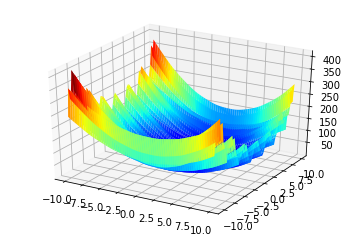

In [9]:
# Just for the visualization
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def obj1(x,y):
    f = (np.sin(3*np.pi*x))**2 +\
        (x-1)**2 * (1+(np.sin(3*np.pi*y))**2) +\
        (y-1)**2 * (1+(np.sin(2*np.pi*y))**2)
    #f=x**2 + y**2
    return f


fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-10, 10, 0.3)
Y = np.arange(-10, 10, 0.3)
X, Y = np.meshgrid(X, Y)
Z = obj1(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, rstride=1, cstride=1 )
plt.show()

# More Will Come...

# http://book.pythontips.com/en/latest/map_filter.html
    
map filter reduce